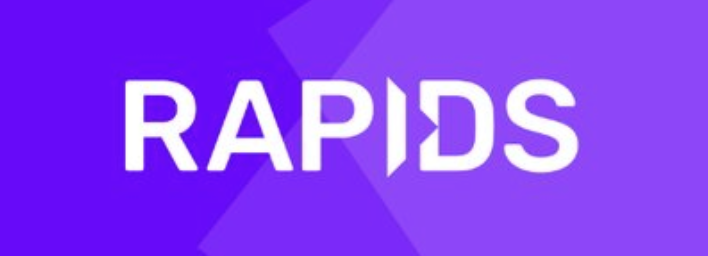

# **<font color="#07a8ed">Cudf**

## **<font color="#07a8ed">Cudf**
Introducción a CUDF, dirigida principalmente a nuevos usuarios.

##CUDF es una biblioteca de marco de datos de Python GPU para acelerar la carga, unir, agregar, filtrar y manipular datos tabulares utilizando una API de estilo DataFrame en el estilo de PANDAS.

##CUDF se ejecuta en una sola GPU. Si desea distribuir su flujo de trabajo en múltiples GPU, tenga más datos de los que puede caber en la memoria en una sola GPU o desea analizar los datos distribuidos en muchos archivos a la vez, es posible que desee usar DASK-CUDF.

###Antes de comenzar, ¡asegúrese de cambiar su tiempo de ejecución para usar un acelerador de hardware de GPU! Use el tiempo de ejecución -> opción de menú "Cambiar tiempo de ejecución" para agregar una GPU.

https://github.com/rapidsai/cudf


https://pandas.pydata.org/


https://github.com/rapidsai/cudf/tree/main/python/dask_cudf

# **<font color="#07a8ed">Comenzar a usar RapidIa**

###Un ecosistema de hardware,software y desarrolladores

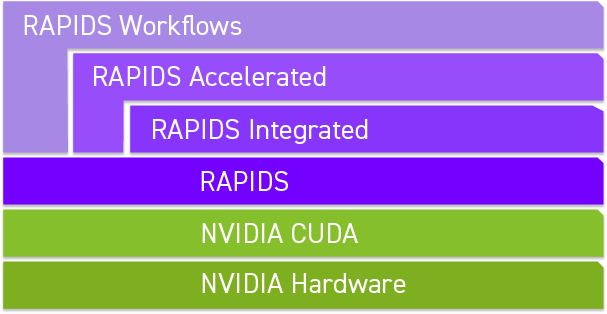

https://rapids.ai/


###Construido sobre una base de hardware potente y #paralelizado por CUDA, el ecosistema RAPIDS se basa en #proyectos centrales, aquellos que amplían sus capacidades #y aquellos construidos sobre RAPIDS.

# **<font color="#07a8ed">Cudf**
##Es una biblioteca para ingeniería y ciencia de datos diseñada para personas familiarizadas con la API de Pandas. Use cuDF en el nuevo modo acelerador de Pandas para acelerar los flujos de trabajo de Pandas sin realizar cambios en el código o use el modo clásico de solo GPU para desbloquear el máximo rendimiento en los marcos de datos.

https://docs.rapids.ai/user-guide/


In [1]:
!nvidia-smi ###La utilidad de línea de comandos nvidia-smi proporciona información adicional sobre el estado de la GPU.

Sat Nov  2 20:09:59 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

https://cupy.dev/


https://docs.rapids.ai/api/cudf/stable/cudf_pandas/


# **<font color="#07a8ed">Cargando un DataFrame**

In [3]:
%%time
# Corrected URL to access the raw content of the CSV file
url = "https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv"

# Read the CSV file from the URL
df = pd.read_csv(url) # Using the variable 'url' instead of the literal string 'url'

CPU times: user 10.3 ms, sys: 5.81 ms, total: 16.1 ms
Wall time: 102 ms


In [4]:
%%time
df

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs


,Unnamed: 0,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,0,132500,0.09,42,50000,906,35,2,1.0,5,electric,electric,septic,No,No,No
1,1,181115,0.92,0,22300,1953,51,3,2.5,6,hot water/steam,gas,septic,No,No,No
2,2,109000,0.19,133,7300,1944,51,4,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,3,155000,0.41,13,18700,1944,51,3,1.5,5,hot air,gas,septic,No,No,No
4,4,86060,0.11,0,15000,840,51,2,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1723,289000,0.38,32,24200,2310,61,5,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,1724,285000,0.94,37,36200,2564,61,4,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,1725,194900,0.39,9,20400,1099,51,2,1.0,3,hot air,gas,public/commercial,No,No,No
1726,1726,125000,0.24,48,16800,1225,51,3,1.0,7,hot air,gas,public/commercial,No,No,No


### Alternativa se carga la extension %load_ext cudf.pandas para aumentar la velocidad de pandas, pertenece al proyecto Rapid

In [1]:
import pandas as pd
import numpy as np


In [3]:
%load_ext cudf.pandas
# pandas API is now GPU accelerated

The cudf.pandas extension is already loaded. To reload it, use:
  %reload_ext cudf.pandas


In [4]:
import cudf
import cupy as cp
import os

cp.random.seed(0)  ###La función random. seed inicializa el generador de números aleatorios. a: Semilla a utilizar

In [5]:
%%time
# Corrected URL to access the raw content of the CSV file
url = "https://raw.githubusercontent.com/VINY2030/datasets/refs/heads/main/SaratogaHouses.csv"

# Read the CSV file from the URL
data = pd.read_csv(url) # Using the variable 'url' instead of the literal string 'url'

CPU times: user 182 ms, sys: 5.13 ms, total: 187 ms
Wall time: 392 ms


In [6]:
%%time
data

CPU times: user 16 µs, sys: 4 µs, total: 20 µs
Wall time: 22.6 µs


,Unnamed: 0,precio,metros_totales,antiguedad,precio_terreno,metros_habitables,universitarios,dormitorios,baños,habitaciones,calefaccion,consumo_calefacion,desague,vistas_lago,nueva_construccion,aire_acondicionado
0,0,132500,0.09,42,50000,906,35,2,1.0,5,electric,electric,septic,No,No,No
1,1,181115,0.92,0,22300,1953,51,3,2.5,6,hot water/steam,gas,septic,No,No,No
2,2,109000,0.19,133,7300,1944,51,4,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,3,155000,0.41,13,18700,1944,51,3,1.5,5,hot air,gas,septic,No,No,No
4,4,86060,0.11,0,15000,840,51,2,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,1723,289000,0.38,32,24200,2310,61,5,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,1724,285000,0.94,37,36200,2564,61,4,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,1725,194900,0.39,9,20400,1099,51,2,1.0,3,hot air,gas,public/commercial,No,No,No
1726,1726,125000,0.24,48,16800,1225,51,3,1.0,7,hot air,gas,public/commercial,No,No,No


# **<font color="#07a8ed">Creando-`cudf.Series`**.

In [32]:
s = cudf.Series([4, 5, 6, None, 8])
s

0     4.0
1     5.0
2     6.0
3    <NA>
4     8.0
dtype: float64

# **<font color="#07a8ed">cudf.DataFrame de 100 millones de registros?**.

In [7]:
%%time
np.random.seed(0)

num_rows = 100_000_000
num_columns = 12

# Create a DataFrame with random data
df_cudf = pd.DataFrame(np.random.randint(0, 100, size=(num_rows, num_columns)),
                  columns=[f'Column_{i}' for i in range(1, num_columns + 1)])
df_cudf

CPU times: user 11.9 s, sys: 4.75 s, total: 16.7 s
Wall time: 17.5 s


,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12
0,44,47,64,67,67,9,83,21,36,87,70,88
1,88,12,58,65,39,87,46,88,81,37,25,77
2,72,9,20,80,69,79,47,64,82,99,88,49
3,29,19,19,14,39,32,65,9,57,32,31,74
4,23,35,75,55,28,34,0,0,36,53,5,38
...,...,...,...,...,...,...,...,...,...,...,...,...
99999995,79,22,46,59,92,33,46,7,49,66,97,59
99999996,70,85,5,24,91,31,72,11,68,26,50,83
99999997,55,84,5,92,61,79,12,18,63,7,58,58
99999998,90,43,83,67,18,16,9,98,47,86,91,23


In [8]:
df_cudf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000000 entries, 0 to 99999999
Data columns (total 12 columns):
 #   Column     Dtype
---  ------     -----
 0   Column_1   int64
 1   Column_2   int64
 2   Column_3   int64
 3   Column_4   int64
 4   Column_5   int64
 5   Column_6   int64
 6   Column_7   int64
 7   Column_8   int64
 8   Column_9   int64
 9   Column_10  int64
 10  Column_11  int64
 11  Column_12  int64
dtypes: int64(12)
memory usage: 8.9 GB


In [9]:
df_cudf.isna().sum() ## registros na

,0
Column_1,0
Column_2,0
Column_3,0
Column_4,0
Column_5,0
Column_6,0
Column_7,0
Column_8,0
Column_9,0
Column_10,0


In [10]:
for i in df_cudf.columns:
    print(i)
    print(df_cudf[i].nunique())

Column_1
100
Column_2
100
Column_3
100
Column_4
100
Column_5
100
Column_6
100
Column_7
100
Column_8
100
Column_9
100
Column_10
100
Column_11
100
Column_12
100


In [11]:
for i in df_cudf.columns:
    print(df_cudf[i].value_counts())

Column_1
90    1001679
21    1001641
53    1001551
10    1001527
76    1001429
       ...   
40     998183
23     998088
12     998075
8      998041
38     997934
Name: count, Length: 100, dtype: int64
Column_2
81    1002781
23    1001996
46    1001477
52    1001435
12    1001431
       ...   
0      998256
29     997433
76     997351
10     997295
65     997140
Name: count, Length: 100, dtype: int64
Column_3
65    1003083
39    1002895
95    1002247
4     1002008
27    1001907
       ...   
17     997969
5      997938
94     997892
74     997694
50     997369
Name: count, Length: 100, dtype: int64
Column_4
29    1002205
50    1002068
2     1002067
5     1001987
38    1001875
       ...   
23     998314
61     998212
41     998209
12     997416
66     997339
Name: count, Length: 100, dtype: int64
Column_5
35    1003302
74    1002964
78    1002258
14    1002208
82    1001911
       ...   
62     998199
2      998155
93     997922
70     997697
45     997652
Name: count, Length: 100, dty

In [9]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
fig = px.parallel_coordinates(df_cudf, color="Column_1", labels={"Column_1": "Column_1", "Column_2": "Column_2", "Column_3": "Column_3"
    , "Column_4": "Column_4", "Column_5": "Column_5", "Column_6": "Column_6", "Column_7": "Column_7", "Column_8": "Column_8",
    "Column_9": "Column_9", "Column_10": "Column_10", "Column_11": "Column_11", "Column_12": "Column_12"},
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

# **<font color="#07a8ed">Creando un cudf.DataFrame con valores especificos**.

In [12]:
dfcudf = cudf.DataFrame(
    {
        "a": list(range(20)),
        "b": list(reversed(range(20))),
        "c": list(range(20)),
    }
)
dfcudf

,a,b,c
0,0,19,0
1,1,18,1
2,2,17,2
3,3,16,3
4,4,15,4
5,5,14,5
6,6,13,6
7,7,12,7
8,8,11,8
9,9,10,9


##Ver las filas superiores de un marcador de datos GPU.

In [13]:
pdf = pd.DataFrame({"a": [0, 1, 2, 3], "b": [0.1, 0.2, None, 0.3]})
gdf = cudf.DataFrame.from_pandas(pdf)
gdf

,a,b
0,0,0.1
1,1,0.2
2,2,NaN
3,3,0.3


In [14]:
dfcudf.head(2)

,a,b,c
0,0,19,0
1,1,18,1


# **<font color="#07a8ed">Seleccionar una columna**.

In [15]:
dfcudf["a"]

0      0
1      1
2      2
3      3
4      4
5      5
6      6
7      7
8      8
9      9
10    10
11    11
12    12
13    13
14    14
15    15
16    16
17    17
18    18
19    19
Name: a, dtype: int64

# **<font color="#07a8ed">Seleccionar por etiquetas**.

##Seleccionar filas del índice 2 al índice 5 de las columnas 'A' y 'B'.

In [17]:
dfcudf.loc[2:5, ["a", "b"]]

,a,b
2,2,17
3,3,16
4,4,15
5,5,14


# **<font color="#07a8ed">Seleccionar por posicion**.


##Seleccionar a través de enteros y slices, como Numpy/Pandas.

In [18]:
dfcudf.iloc[0]

a     0
b    19
c     0
Name: 0, dtype: int64

In [19]:
dfcudf.iloc[0:3, 0:2]

,a,b
0,0,19
1,1,18
2,2,17


#También puede seleccionar elementos de un marco de datos o una serie con acceso de índice directo.

In [20]:
dfcudf[3:5]

,a,b,c
3,3,16,3
4,4,15,4


# **<font color="#07a8ed">Indexacion Booleana**.


##Seleccionar filas en un marco o serie de datos mediante indexación booleana directa.

In [22]:
dfcudf[dfcudf.b > 15]

,a,b,c
0,0,19,0
1,1,18,1
2,2,17,2
3,3,16,3


##Seleccionar valores de un `DataFrame` donde se cumple una condición booleana, a través de la API 'Query`.

In [23]:
dfcudf.query("b == 3")

,a,b,c
16,16,3,16


##Con CUDF estándar, puede usar la palabra clave local_dict o pasar directamente la variable a través de la palabra clave @. Los operadores lógicos compatibles incluyen>, <,> =, <=, == y! =.

In [24]:
cudf_comparator = 3
dfcudf.query("b == @cudf_comparator")

,a,b,c
16,16,3,16


##Usando el método ISIN para el filtrado.

In [25]:
dfcudf[dfcudf.a.isin([0, 5])]

,a,b,c
0,0,19,0
5,5,14,5


# **<font color="#07a8ed">Multiindice**.

##CUDF admite la indexación jerárquica de los marcos de datos utilizando Multiindex. La agrupación jerárquicamente (ver la agrupación a continuación) produce automáticamente un marco de datos con un multiíndex.

In [26]:
arrays = [["a", "a", "b", "b"], [1, 2, 3, 4]]
tuples = list(zip(*arrays))
idx = cudf.MultiIndex.from_tuples(tuples)
idx

MultiIndex([('a', 1),
            ('a', 2),
            ('b', 3),
            ('b', 4)],
           )

###Este índice puede respaldar cualquier eje de un marcado de datos.

In [27]:
gdf1 = cudf.DataFrame(
    {"first": cp.random.rand(4), "second": cp.random.rand(4)}
)
gdf1.index = idx
gdf1

first    second
a 1  0.438451  0.053011
  2  0.460365  0.337699
b 3  0.250215  0.396763
  4  0.494744  0.874419

In [28]:
gdf2 = cudf.DataFrame(
    {"first": cp.random.rand(4), "second": cp.random.rand(4)}
).T
gdf2.columns = idx
gdf2

a                  b          
               1        2         3         4
first   0.482167  0.04284  0.508414  0.654550
second  0.512604  0.26430  0.051981  0.578997

##Acceso a los valores de un marco de datos con un multiíndex, ambos con .loc

In [29]:
gdf1.loc[("b", 3)]

first     0.250215
second    0.396763
Name: ('b', 3), dtype: float64

e `.iloc`

In [30]:
gdf1.iloc[0:2]

first    second
a 1  0.438451  0.053011
  2  0.460365  0.337699

# **<font color="#07a8ed">Missing Data**.

##Los datos faltantes se pueden reemplazar utilizando el método `Fillna`.

In [33]:
s = cudf.Series([4, 5, 6, None, 8])
s

0     4.0
1     5.0
2     6.0
3    <NA>
4     8.0
dtype: float64

In [34]:
s.fillna(999)

0      4.0
1      5.0
2      6.0
3    999.0
4      8.0
dtype: float64

# **<font color="#07a8ed">Estadistica**.

Calculando estadistica descriptiva de una serie

In [36]:
s.describe()

count    4.000000
mean     5.750000
std      1.707825
min      4.000000
25%      4.750000
50%      5.500000
75%      6.500000
max      8.000000
dtype: float64

In [35]:
s.mean(), s.var()

(5.75, 2.9166666666666643)

# **<font color="#07a8ed">ApplyMap**.

 ##Aplicar funciones a una `series`. Tenga en cuenta que la aplicación de funciones definidas por el usuario directamente con DASK-CUDF aún no se ha implementado. Por ahora, puede usar [MAP_PARTITIONS] (http://docs.doask.org/en/stable/generated/dask.dataframe.dataframe.map_partitions.html) para aplicar una función a cada partición de los datos distribuidos.

In [38]:
def add_ten(num):
    return num + 10


dfcudf["a"].apply(add_ten)

0     10
1     11
2     12
3     13
4     14
5     15
6     16
7     17
8     18
9     19
10    20
11    21
12    22
13    23
14    24
15    25
16    26
17    27
18    28
19    29
Name: a, dtype: int64

# **<font color="#07a8ed">Histograma**.

https://docs.rapids.ai/visualization/


##Contando el número de ocurrencias de cada valor único de variable

In [39]:
dfcudf.a.value_counts()

a
0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: count, dtype: int64

# **<font color="#07a8ed">Cadena de caracteres**.


##Al igual que los pandas, CUDF proporciona métodos de procesamiento de cadenas en el atributo STR de la serie. La documentación completa de los métodos de cadena es un trabajo en progreso. Consulte la documentación de la API CUDF para obtener más información.


In [40]:
s = cudf.Series(["A", "B", "C", "Aaba", "Baca", None, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: object

##Además de una simple manipulación, también podemos hacer coincidir las cadenas usando [expresiones regulares] (https://docs.rapids.ai/api/cudf/stable/api_docs/api/cudf.core.column.string.stringmethods.match.html ).

In [41]:
s.str.match("^[aAc].+")

0    False
1    False
2    False
3     True
4    False
5     <NA>
6    False
7    False
8     True
dtype: bool

# **<font color="#07a8ed">Concat**.

##Concatenando  `series` y` Dataframes` en cuanto a la fila.

In [47]:
s = cudf.Series([1, 2, 3, None, 5])
s1= cudf.DataFrame({"s": [1, 2, 3, None, 5], "b": [10, 20, 30, 40, 50]})
s1 =cudf.concat([s, s])
s1

0     1.0
1     2.0
2     3.0
3    <NA>
4     5.0
0     1.0
1     2.0
2     3.0
3    <NA>
4     5.0
dtype: float64

In [48]:
s2 =cudf.concat([s, s])
s2

0     1.0
1     2.0
2     3.0
3    <NA>
4     5.0
0     1.0
1     2.0
2     3.0
3    <NA>
4     5.0
dtype: float64

In [53]:
s3= cudf.DataFrame(cudf.concat([s,s1]))

In [54]:
s3

,0
0,1.0
1,2.0
2,3.0
3,<NA>
4,5.0
0,1.0
1,2.0
2,3.0
3,<NA>
4,5.0


In [55]:
type(s3)

cudf.core.dataframe.DataFrame

# **<font color="#07a8ed">Join**.

##Realizar el estilo SQL que fusiona. Tenga en cuenta que el orden de DataFrame no se mantiene, pero puede restaurarse después de la fusión mediante la clasificación del índice.

In [56]:
df_a = cudf.DataFrame()
df_a["key"] = ["a", "b", "c", "d", "e"]
df_a["vals_a"] = [float(i + 10) for i in range(5)]

df_b = cudf.DataFrame()
df_b["key"] = ["a", "c", "e"]
df_b["vals_b"] = [float(i + 100) for i in range(3)]

merged = df_a.merge(df_b, on=["key"], how="left")
merged

,key,vals_a,vals_b
0,a,10.0,100.0
1,b,11.0,<NA>
2,c,12.0,101.0
3,d,13.0,<NA>
4,e,14.0,102.0


# **<font color="#07a8ed">Agrupacion**.

##Al igual que [Pandas] (https://pandas.pydata.org/docs/user_guide/groupby.html), Cudf y Dask-cudf admiten el paradigma de Groupby [split-apply-Combine Groupby] (https://doi.org/10.18637 /jss.v040.i01).

In [62]:
## dfcudf

In [59]:
dfcudf["agg_col1"] = [1 if x % 2 == 0 else 0 for x in range(len(dfcudf))]
dfcudf["agg_col2"] = [1 if x % 3 == 0 else 0 for x in range(len(dfcudf))]


Agrupar y luego aplicar la función `Sum` a los datos agrupados.

In [61]:
dfcudf.groupby("agg_col1").sum()

,a,b,c,agg_col2
agg_col1,,,,
0,100,90,100,3
1,90,100,90,4


Agrupación jerárquicamente luego aplicando la función `Sum` a datos agrupados.

In [64]:
dfcudf.groupby(["agg_col1", "agg_col2"]).sum()

a   b   c
agg_col1 agg_col2            
0        0         73  60  73
         1         27  30  27
1        0         54  60  54
         1         36  40  36

Agrupar y aplicar funciones estadísticas a columnas específicas, utilizando `AGG`.

In [65]:
dfcudf.groupby("agg_col1").agg({"a": "max", "b": "mean", "c": "sum"})

,a,b,c
agg_col1,,,
0,19,9.0,100
1,18,10.0,90


# **<font color="#07a8ed">Sorting**.

Clasificación por valores.

In [66]:
dfcudf.sort_values(by="b")

,a,b,c,agg_col1,agg_col2
19,19,0,19,0,0
18,18,1,18,1,1
17,17,2,17,0,0
16,16,3,16,1,0
15,15,4,15,0,1
14,14,5,14,1,0
13,13,6,13,0,0
12,12,7,12,1,1
11,11,8,11,0,0
10,10,9,10,1,0


# **<font color="#07a8ed">Transpose**.

Transposición de un marcador de datos, utilizando el método `Transpose` o la propiedad` T`. Actualmente, todas las columnas deben tener el mismo tipo. La transposición no se implementa actualmente en Dask-Cudf.

In [67]:
sample = cudf.DataFrame({"a": [1, 2, 3], "b": [4, 5, 6]})
sample

,a,b
0,1,4
1,2,5
2,3,6


In [68]:
sample.transpose()

,0,1,2
a,1,2,3
b,4,5,6


# **<font color="#07a8ed">TimeSeries**.

`Dataframes` admite columnas escrita` DateTime`, que permiten a los usuarios interactuar y filtrar datos basados ​​en marcas de tiempo específicas.

In [70]:
import datetime as dt
import cudf
import pandas as pd
import cupy as cp

date_df = cudf.DataFrame()
# Create the DatetimeIndex without 'freq'
dates = pd.date_range("11/20/2018", periods=72)
# Convert to cudf.Series and assign to column
date_df["date"] = cudf.Series(dates)
date_df["value"] = cp.random.sample(len(date_df))

search_date = dt.datetime.strptime("2018-11-23", "%Y-%m-%d")
date_df.query("date <= @search_date")

,date,value
0,2018-11-20,0.385556
1,2018-11-21,0.908215
2,2018-11-22,0.641620
3,2018-11-23,0.283399


# **<font color="#07a8ed">Categoricals**.

`Dataframes` admite columnas categóricas.

In [71]:
gdf = cudf.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "grade": ["a", "b", "b", "a", "a", "e"]}
)
gdf["grade"] = gdf["grade"].astype("category")
gdf

,id,grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a
5,6,e


Acceso a las categorías de una columna. Tenga en cuenta que esto no es compatible actualmente en Dask-Cudf.

In [72]:
gdf.grade.cat.categories

Index(['a', 'b', 'e'], dtype='object')

Acceso a los valores del código subyacente de cada observación categórica.

In [73]:
gdf.grade.cat.codes

0    0
1    1
2    1
3    0
4    0
5    2
dtype: uint8

# **<font color="#07a8ed">Conversiones de Datos**.

## Pandas

Convertir un CUDF `DataFrame` a un Pandas` DataFrame`.

In [75]:
gdf.head().to_pandas()

,id,grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,a


## Numpy

Convertir un marco de datos CUDF o DASK-CUDF a una ndarray numpy.

In [76]:
gdf.to_numpy()

array([[1, 'a'],
       [2, 'b'],
       [3, 'b'],
       [4, 'a'],
       [5, 'a'],
       [6, 'e']], dtype=object)

Convertir un CUDF o dask-Cudf `series` a un` ndarray` numpy.

In [81]:
gdf["grade"] = gdf["grade"].astype(str)
grade_array = gdf["grade"].to_numpy()

In [82]:
grade_array

array(['a', 'b', 'b', 'a', 'a', 'e'], dtype=object)

In [79]:
gdf["id"].to_numpy()

array([1, 2, 3, 4, 5, 6])

## Arrow

https://pypi.org/project/pyarrow/


Convertir un marco de datos CUDF o DASK-CUDF a una tabla Pyarrow.

In [84]:
gdf.to_arrow()

pyarrow.Table
id: int64
grade: string
----
id: [[1,2,3,4,5,6]]
grade: [["a","b","b","a","a","e"]]

# **<font color="#07a8ed">Lectura de archivos**.

## CSV

Escribir en un archivo CSV.

In [86]:
# Assuming you have data to create a DataFrame, replace this with your actual data
data = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data)  # Create a DataFrame

if not os.path.exists("example_output"):
    os.mkdir("example_output")

df.to_csv("example_output/foo.csv", index=False)

In [87]:
df

,col1,col2
0,1,3
1,2,4


Lectura de un archivo CSV.

In [88]:
df = cudf.read_csv("example_output/foo.csv")
df

,col1,col2
0,1,3
1,2,4


Tenga en cuenta que para el caso DASK-CUDF, utilizamos dask_cudf.read_csv con preferencia a dask_cudf.from_cudf (cudf.read_csv) ya que el primero puede paralelarse a través de múltiples GPU y manejar archivos CSV más grandes que caben en la memoria en una sola GPU.

Leer todos los archivos CSV en un directorio en un solo dask_cudf.dataframe, usando el comodín Star.

## Parquet

Escribir a los archivos de Parquet con el escritor de parquet acelerado de CUDF

In [90]:
df.to_parquet("example_output/temp_parquet")
df

,col1,col2
0,1,3
1,2,4


Lectura de archivos de parquet con el lector de parquet acelerado de GPU de CUDF.

In [91]:
df = cudf.read_parquet("example_output/temp_parquet")
df

,col1,col2
0,1,3
1,2,4


## ORC

Escribir archivos ORC.

####Los archivos ORC (Optimized Row Columnar) se usan para almacenar datos en sistemas de procesamiento de big data como Hadoop. Son un formato de almacenamiento en columnas que optimiza la lectura, escritura y procesamiento de datos

In [93]:
df.to_orc("example_output/temp_orc")
df

,col1,col2
0,1,3
1,2,4


y lectura

In [94]:
df2 = cudf.read_orc("example_output/temp_orc")
df2

,col1,col2
0,1,3
1,2,4


# **<font color="#07a8ed">Rendimiento con gran marco de datos**.

CUDF es excelente para manejar grandes marcos de datos. En este ejemplo agregamos valores después de agrupar por una clave:

In [2]:
%load_ext cudf.pandas
# pandas API is now GPU accelerated

In [3]:
import cudf
import cupy as cp
import os

cp.random.seed(0)  ###La función random. seed inicializa el generador de números aleatorios. a: Semilla a utilizar

In [4]:
nr = 100_000_000
df = cudf.DataFrame({
    'key': cp.random.randint(0, 10, nr),
    'value': cp.random.random(nr)
})

%time df.groupby('key')['value'].mean()

pdf = df.to_pandas()
%time pdf.groupby('key')['value'].mean()

CPU times: user 150 ms, sys: 67.5 ms, total: 218 ms
Wall time: 354 ms
CPU times: user 1.98 s, sys: 363 ms, total: 2.34 s
Wall time: 2.38 s


,value
key,
0,0.500123
1,0.499843
2,0.499986
3,0.499835
4,0.499934
5,0.499979
6,0.500124
7,0.500028
8,0.500055


In [5]:
import cudf
import cupy as cp

# Assuming df is your cuDF DataFrame
total_estimated_size = df.memory_usage('bytes').sum()
print(f"Total estimated size of the DataFrame: {total_estimated_size} bytes")

Total estimated size of the DataFrame: 1600000000 bytes


CUDF también tiene algoritmos de unión eficientes. En este ejemplo, usamos una unión hash para combinar valores de dos marcos de datos basados ​​en una clave:

In [6]:
nr = 50_000_000
df = cudf.DataFrame({
        'key': cp.random.randint(0, 10, nr),
        'value': cp.random.random(nr)
})
lookup = cudf.DataFrame({
        'key': range(10),
        'lookup': cp.random.random(10)
})

%time df.merge(lookup, on='key')

pdf = df.to_pandas()
plookup = lookup.to_pandas()
%time pdf.merge(plookup, on='key')

CPU times: user 329 ms, sys: 30.5 ms, total: 360 ms
Wall time: 420 ms
CPU times: user 2.02 s, sys: 1.02 s, total: 3.03 s
Wall time: 3.03 s


,key,value,lookup
0,8,0.344196,0.631088
1,2,0.891686,0.453598
2,6,0.240265,0.516391
3,8,0.990025,0.631088
4,0,0.325056,0.305978
...,...,...,...
49999995,5,0.477288,0.654454
49999996,7,0.083315,0.638059
49999997,0,0.353334,0.305978
49999998,9,0.784018,0.391988


La computación y la aplicación de filtros en los marcos de datos CUDF también son operaciones eficientes.

In [7]:
nr = 20_000_000
df = cudf.DataFrame({
    'rating_a': cp.random.randint(1, 5, nr),
    'rating_b': cp.random.randint(1, 5, nr),
    'rating_c': cp.random.randint(1, 5, nr),
})

%time df.where(df>3)

pdf = df.to_pandas()
%time pdf.where(pdf>3)

CPU times: user 23.4 ms, sys: 4.14 ms, total: 27.6 ms
Wall time: 60.7 ms
CPU times: user 596 ms, sys: 318 ms, total: 914 ms
Wall time: 649 ms


,rating_a,rating_b,rating_c
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,4.0,NaN
3,NaN,NaN,NaN
4,4.0,4.0,NaN
...,...,...,...
19999995,NaN,NaN,NaN
19999996,NaN,NaN,NaN
19999997,4.0,4.0,NaN
19999998,NaN,4.0,NaN


Y la clasificación es otra tarea donde CUDF muestra una gran aceleración.

In [8]:
nr = 50_000_000
df = cudf.DataFrame({
    'a': cp.random.rand(nr),
    'b': cp.random.rand(nr),
    'c': cp.random.rand(nr),
})

%time df.sort_values('a')

pdf = df.to_pandas()
%time pdf.sort_values('a')

CPU times: user 780 ms, sys: 3.74 ms, total: 784 ms
Wall time: 779 ms
CPU times: user 14.4 s, sys: 747 ms, total: 15.1 s
Wall time: 15.2 s


,a,b,c
44762352,2.380318e-08,0.456048,0.606121
36534872,2.598448e-08,0.385132,0.939607
33149734,3.009496e-08,0.453546,0.508751
7328084,5.919987e-08,0.339662,0.656763
39685212,6.444831e-08,0.021930,0.567259
...,...,...,...
46071560,9.999999e-01,0.697279,0.118547
7634351,9.999999e-01,0.765329,0.479413
6875762,1.000000e+00,0.659536,0.643445
44716193,1.000000e+00,0.170701,0.860770
